# CS 416 - Intro to Deep Learning
## Assignment - 1

___

**Name:** Syed Muhammad Ashhar Shah

**Reg No:** 2020478

# Task 1

- For following house prediction dataset, [House Data](https://raw.githubusercontent.com/Tan-Moy/medium_articles/master/art2_multivariate_linear_regression/home.txt)

- Split the dataset into training/ testing. Estimate the parameters for Linear regression on the training set using the batch gradient method.

- Predict the new values of Y using **Ŷ = Xŵ** (X being the test part and ŵ are the optimized weights on the training part).

## Importing the required libraraies

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

## Getting the dataset from the URL

In [2]:
dataset = "https://raw.githubusercontent.com/Tan-Moy/medium_articles/master/art2_multivariate_linear_regression/home.txt"

In [3]:
df = pd.read_csv(dataset)

In [4]:
df.describe()

,2104,3,399900
count,46.000000,46.000000,46.000000
mean,1998.434783,3.173913,339119.456522
std,803.333019,0.768963,126103.418369
min,852.000000,1.000000,169900.000000
25%,1429.500000,3.000000,249900.000000
50%,1870.000000,3.000000,299900.000000
75%,2284.500000,4.000000,368875.000000
max,4478.000000,5.000000,699900.000000


## Converting dataset to _numpy_ array

In [5]:
dataset_array = np.array(df, dtype=float)
print("Dataset Array Shape: " + str(dataset_array.shape))

X = []
y = []

for row in dataset_array:
  X.append(row[:2])
  y.append(row[2])


X = np.array(X)
y = np.array(y)

print("X Shape: " + str(X.shape))
print("y Shape: " + str(y.shape))

Dataset Array Shape: (46, 3)
X Shape: (46, 2)
y Shape: (46,)


## Normalizing the data

In [6]:
def normalize(x):
  for i in range(0,x.shape[1]-1):
    x[:,i] = ((x[:,i] - np.mean(x[:,i]))/np.std(x[:, i]))

  return x

In [7]:
X = normalize(X)

## Performing test-train split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

print("X_train Shape: " + str(X_train.shape))
print("X_test Shape: " + str(X_test.shape))
print("y_train Shape: " + str(y_train.shape))
print("y_test Shape: " + str(y_test.shape))

X_train Shape: (41, 2)
X_test Shape: (5, 2)
y_train Shape: (41,)
y_test Shape: (5,)


## Initialize random weights

In [9]:
weights = np.random.rand(X.shape[1] + 1)

weights[0] = 1

print("Shape of weights: " + str(weights.shape))
print("Random Weights: " + str(weights))

Shape of weights: (3,)
Random Weights: [1.         0.95039757 0.34831999]


## Function for forward propoggation ( *y = wx* )

Linear Regression Equation::
`Y = θ0 + (θ1 x X0) + (θ2 x X1)`



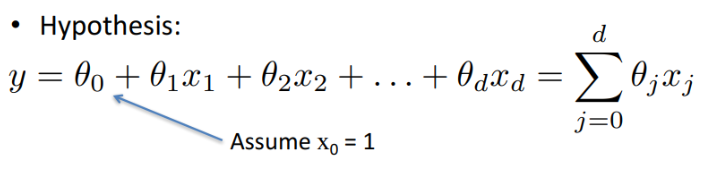

In [10]:
def forward_prop(w, x):
  y = []
  for row in x:
    y.append(w[0] + row[0]*w[1] + row[1]*w[2])

  y = np.array(y)
  return y

In [11]:
hx = forward_prop(weights, X_train)
print("Prediction Shape: " + str(hx.shape))
print(hx)

Prediction Shape: (41,)
[1.91525669 2.5530428  1.08991944 2.21812333 2.37721008 2.28606039
 1.13298051 1.30522481 2.0468322  1.57316038 1.3985238  1.56837582
 2.80877398 5.70750945 4.30753859 3.07336411 2.32338373 2.67600234
 0.3253424  1.50593351 3.59129314 2.34969883 1.44158488 1.17125703
 5.04460439 1.48943052 2.33151374 3.12360203 2.58892702 0.99996589
 2.44299783 1.76813136 2.52528858 0.97030535 3.62837351 1.56454442
 2.16908155 1.36144344 0.15405127 0.88513636 1.37340485]


## Function for back propogation (Gradient Descent)

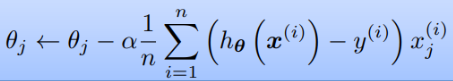

In [12]:
def back_prop(w, y, y_hat, X, alpha):
  # get the total number of rows
  n = y.shape[0]
  # create an error against each weight value
  dldw = np.zeros(*w.shape)

  for predict, actual, x in zip(y,y_hat,X):
    dldw[0] = dldw[0] + ((predict - actual))
    dldw[1] = dldw[1] + ((predict - actual) * x[0])
    dldw[2] = dldw[2] + ((predict - actual) * x[1])

  w[0] = w[0] - (dldw[0] * alpha)/n
  w[1] = w[1] - (dldw[1] * alpha)/n
  w[2] = w[2] - (dldw[2] * alpha)/n

  return w

In [13]:
back_prop(weights, hx, y_train, X_train, 0.05)


array([16746.98516196,  5517.53494847, 55820.80830624])

## Cost Function

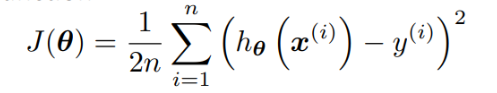

In [14]:
def cost(y, y_hat):
  n = y.shape[0]

  sum = 0

  for predict, actual in zip(y, y_hat):
    sum = sum + (predict - actual)**2

  j = sum / (2 * n)

  return j

In [15]:
cost(hx, y_train)

63669719911.83621

In [16]:
##

## Carrying out the learning ( ***Schotatic Gradient Descent*** )

In [17]:
costs = []

costs.append(cost(weights, y_train))

for epoch in range(10000):
  hx = forward_prop(weights, X_train)
  c = cost(hx, y_train)

  if epoch % 1000 == 0:
    print("Cost: " +str(c))

  costs.append(c)
  weights = back_prop(weights, hx, y_train, X_train, 0.1)

Cost: 15265431537.426931
Cost: 2091179688.7165892
Cost: 2088774898.9014125
Cost: 2088771886.0992904
Cost: 2088771882.3247495
Cost: 2088771882.32002
Cost: 2088771882.3200145
Cost: 2088771882.3200147
Cost: 2088771882.3200145
Cost: 2088771882.3200145


## Final Weights

In [18]:
weights

array([342848.37237505, 105253.071568  ,  -2935.03475094])

In [19]:
costs = np.array(costs)

print(costs.shape)
print(costs[0:10])

(10001,)
[4.54185480e+10 1.52654315e+10 5.46888741e+09 4.93296004e+09
 4.73046583e+09 4.57191061e+09 4.44175120e+09 4.33431781e+09
 4.24524805e+09 4.17102530e+09]


## Prediction

In [20]:
predictions = forward_prop(weights, X_test)

In [21]:
predictions

array([233442.26676336, 228673.40953974, 292676.31040437, 484867.01705358,
       371056.05185326])

In [22]:
y_test

array([229900., 239500., 368500., 579900., 449900.])

### Percentage error in predictions

In [25]:
((predictions-y_test)/y_test) * 100

array([  1.54078589,  -4.52049706, -20.57630654, -16.38782255,
       -17.52477176])